## Broadcasting

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index=['Ohio','Colorado','Utah','New York'],
                   columns=['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [7]:
# 행의 수가 같은 컬럼간 연산 --> 벡터연산
data['one']

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int32

In [8]:
# 같은 인덱스끼리 연산

data_sum = data['one'] + data['two']
data_sum

Ohio         1
Colorado     9
Utah        17
New York    25
dtype: int32

In [9]:
# 스칼라와 연산

data['one']*2

Ohio         0
Colorado     8
Utah        16
New York    24
Name: one, dtype: int32

In [10]:
# 길이와 다른 벡터 연산

data['one'] + pd.Series([1,6])

0          NaN
1          NaN
Colorado   NaN
New York   NaN
Ohio       NaN
Utah       NaN
dtype: float64

In [11]:
pd.Series([1,6])

0    1
1    6
dtype: int64

In [12]:
# 길이가 다른 벡터 연산

tt = pd.Series([1,6], index=['Ohio','Colorado'])
tt

Ohio        1
Colorado    6
dtype: int64

### Data type 변환

In [13]:
data1 = data.reset_index()
data1

,index,one,two,three,four
0,Ohio,0,1,2,3
1,Colorado,4,5,6,7
2,Utah,8,9,10,11
3,New York,12,13,14,15


In [14]:
data1.dtypes

index    object
one       int32
two       int32
three     int32
four      int32
dtype: object

In [15]:
# 1. one 컬럼을 문자열형으로
data11 = data1.copy()
data11

,index,one,two,three,four
0,Ohio,0,1,2,3
1,Colorado,4,5,6,7
2,Utah,8,9,10,11
3,New York,12,13,14,15


In [16]:
data11['one']=data11['one'].astype(str)
data11.dtypes

index    object
one      object
two       int32
three     int32
four      int32
dtype: object

In [17]:
# 2. one 컬럼 다시 수치형

data12 = data11.copy()
data12

,index,one,two,three,four
0,Ohio,0,1,2,3
1,Colorado,4,5,6,7
2,Utah,8,9,10,11
3,New York,12,13,14,15


In [18]:
data12['one'] = data12['one'].astype('int')
data12.dtypes

index    object
one       int32
two       int32
three     int32
four      int32
dtype: object

In [19]:
data12['index'] = data12['index'].astype('category')
data12.dtypes

index    category
one         int32
two         int32
three       int32
four        int32
dtype: object

In [20]:
data12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   index   4 non-null      category
 1   one     4 non-null      int32   
 2   two     4 non-null      int32   
 3   three   4 non-null      int32   
 4   four    4 non-null      int32   
dtypes: category(1), int32(4)
memory usage: 388.0 bytes


### 데이터프레임에 데이터 추가 / 테이블 병합

In [21]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [22]:
add_table1 = pd.DataFrame(np.random.choice(100,16).reshape((4,4)),
                          index=['Hawaii','Washington', 'Seattle', 'Texas'],
                          columns=['one','two','three','four'])
add_table1

,one,two,three,four
Hawaii,67,4,94,38
Washington,75,47,16,33
Seattle,78,45,0,17
Texas,21,43,27,44


In [23]:
# concat 메서드 (컬럼명 같을 때) concatenate

pd.concat([data,add_table1])

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15
Hawaii,67,4,94,38
Washington,75,47,16,33
Seattle,78,45,0,17
Texas,21,43,27,44


In [24]:
pd.concat([data,add_table1], axis=1)

,one,two,three,four,one,two,three,four
Ohio,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
Colorado,4.0,5.0,6.0,7.0,NaN,NaN,NaN,NaN
Utah,8.0,9.0,10.0,11.0,NaN,NaN,NaN,NaN
New York,12.0,13.0,14.0,15.0,NaN,NaN,NaN,NaN
Hawaii,NaN,NaN,NaN,NaN,67.0,4.0,94.0,38.0
Washington,NaN,NaN,NaN,NaN,75.0,47.0,16.0,33.0
Seattle,NaN,NaN,NaN,NaN,78.0,45.0,0.0,17.0
Texas,NaN,NaN,NaN,NaN,21.0,43.0,27.0,44.0


In [25]:
data.append(add_table1)

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15
Hawaii,67,4,94,38
Washington,75,47,16,33
Seattle,78,45,0,17
Texas,21,43,27,44


In [26]:
add_table2 = pd.DataFrame(np.random.choice(100,16).reshape((4,4)),
                          index=['Hawaii','Washington', 'Seattle', 'Texas'],
                          columns=['five','six','seven','eight'])
add_table2

,five,six,seven,eight
Hawaii,81,23,22,50
Washington,41,75,86,9
Seattle,3,62,15,72
Texas,39,75,60,98


In [27]:
pd.concat([data,add_table2])

,one,two,three,four,five,six,seven,eight
Ohio,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
Colorado,4.0,5.0,6.0,7.0,NaN,NaN,NaN,NaN
Utah,8.0,9.0,10.0,11.0,NaN,NaN,NaN,NaN
New York,12.0,13.0,14.0,15.0,NaN,NaN,NaN,NaN
Hawaii,NaN,NaN,NaN,NaN,81.0,23.0,22.0,50.0
Washington,NaN,NaN,NaN,NaN,41.0,75.0,86.0,9.0
Seattle,NaN,NaN,NaN,NaN,3.0,62.0,15.0,72.0
Texas,NaN,NaN,NaN,NaN,39.0,75.0,60.0,98.0


In [28]:
data.append(add_table2)

,one,two,three,four,five,six,seven,eight
Ohio,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
Colorado,4.0,5.0,6.0,7.0,NaN,NaN,NaN,NaN
Utah,8.0,9.0,10.0,11.0,NaN,NaN,NaN,NaN
New York,12.0,13.0,14.0,15.0,NaN,NaN,NaN,NaN
Hawaii,NaN,NaN,NaN,NaN,81.0,23.0,22.0,50.0
Washington,NaN,NaN,NaN,NaN,41.0,75.0,86.0,9.0
Seattle,NaN,NaN,NaN,NaN,3.0,62.0,15.0,72.0
Texas,NaN,NaN,NaN,NaN,39.0,75.0,60.0,98.0


---


In [29]:
frame = pd.DataFrame(np.random.randn(4,3), columns=list('bde'),
                    index=['Utah','Ohio','Texas','Oregon'])
frame

,b,d,e
Utah,-0.896686,0.543811,1.823167
Ohio,0.574708,1.024596,-1.339848
Texas,-1.167220,-1.279870,1.291713
Oregon,-0.165720,-0.227965,1.398215


In [30]:
frame = np.abs(frame)
frame

,b,d,e
Utah,0.896686,0.543811,1.823167
Ohio,0.574708,1.024596,1.339848
Texas,1.167220,1.279870,1.291713
Oregon,0.165720,0.227965,1.398215


### 람다 표현식

ex) 컬럼별로 최대-최솟값을 구할 때

In [31]:
b = frame['b'].max() - frame['b'].min()
d = frame['d'].max() - frame['d'].min()
e = frame['e'].max() - frame['e'].min()

b,d,e

(1.001499777144727, 1.0519053765174164, 0.5314542681525556)

In [32]:
ut = frame.loc['Utah',:].max() - frame.loc['Utah',:].min()
ut

1.2793564293421098

In [33]:
# 람다 표현식

f = lambda x: x.max() - x.min()
frame.apply(f)

# frame.apply(lambda x: x.max() - x.min())

b    1.001500
d    1.051905
e    0.531454
dtype: float64

In [35]:
frame.apply(f, axis=1)

Utah      1.279356
Ohio      0.765140
Texas     0.124493
Oregon    1.232495
dtype: float64

### applymap() vs map()

In [36]:
f1 = lambda x: '%.2f'%x
frame1 = frame.applymap(f1) # DF에 적용
frame1

,b,d,e
Utah,0.90,0.54,1.82
Ohio,0.57,1.02,1.34
Texas,1.17,1.28,1.29
Oregon,0.17,0.23,1.40


In [37]:
frame['e'].map(f1) # Series에 적용

Utah      1.82
Ohio      1.34
Texas     1.29
Oregon    1.40
Name: e, dtype: object

### sorting and ranking

In [38]:
obj = pd.Series(range(4), index=['d','a','b','c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [39]:
frame = pd.DataFrame(np.arange(12).reshape((3,4)),
                    index = ['three','one','four'],
                    columns = ['d','a','b','c'])
frame.sort_index()

,d,a,b,c
four,8,9,10,11
one,4,5,6,7
three,0,1,2,3


In [40]:
frame.sort_index(ascending=False)

,d,a,b,c
three,0,1,2,3
one,4,5,6,7
four,8,9,10,11


In [41]:
frame.sort_index(axis=1) # 열

,a,b,c,d
three,1,2,3,0
one,5,6,7,4
four,9,10,11,8


---

In [42]:
frame = pd.DataFrame({'b':[4,7,-3,2], 'a':[0,1,0,1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [43]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [44]:
frame.sort_values(by=['a','b']) # a 기준으로 먼저 정렬

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


### group by

In [45]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5) 
})
df

,key1,key2,data1,data2
0,a,one,-0.784621,0.095906
1,a,two,-0.815910,-0.019264
2,b,one,0.840039,0.688944
3,b,two,0.378946,0.578716
4,a,one,0.207206,-1.170149


In [46]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [47]:
grouped.mean()

key1
a   -0.464442
b    0.609493
Name: data1, dtype: float64

In [48]:
grouped1 = df[['data1','data2']].groupby(df['key1'])
grouped1

In [49]:
grouped1.mean()

,data1,data2
key1,,
a,-0.464442,-0.364503
b,0.609493,0.633830


In [50]:
grouped1.max()

,data1,data2
key1,,
a,0.207206,0.095906
b,0.840039,0.688944


In [51]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.288708
      two    -0.815910
b     one     0.840039
      two     0.378946
Name: data1, dtype: float64

In [52]:
means1 = df[['data1','data2']].groupby([df['key1'], df['key2']]).mean()
means1

data1     data2
key1 key2                    
a    one  -0.288708 -0.537122
     two  -0.815910 -0.019264
b    one   0.840039  0.688944
     two   0.378946  0.578716

In [53]:
means.unstack()

key2,one,two
key1,,
a,-0.288708,-0.815910
b,0.840039,0.378946


In [54]:
means1.unstack()

data1               data2          
key2       one       two       one       two
key1                                        
a    -0.288708 -0.815910 -0.537122 -0.019264
b     0.840039  0.378946  0.688944  0.578716

---

In [55]:
tips = pd.read_csv('data/tips.csv')
tips.head(4)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2


In [56]:
# tips 데이터에 tip_pct(tip/total bill) 컬럼 추가

tips['tip_pct'] = tips['tip']/tips['total_bill']
tips.pivot_table(index=['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [57]:
tips.pivot_table(index=['day','smoker'], aggfunc='sum')

size     tip   tip_pct  total_bill
day  smoker                                    
Fri  No         9   11.25  0.606602       73.68
     Yes       31   40.71  2.621746      252.20
Sat  No       115  139.63  7.112145      884.78
     Yes      104  120.77  6.212055      893.62
Sun  No       167  180.57  9.126438     1168.88
     Yes       49   66.82  3.557756      458.28
Thur No       112  120.32  7.213414      770.09
     Yes       40   51.51  2.785676      326.24

In [58]:
grouped = tips.groupby(['day','smoker'])
grouped.agg('mean')

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [59]:
# agg에 여러 메서드 전달하기

func = ['mean', 'median','count']
grouped.agg(func)

total_bill                     tip                   size         \
                  mean  median count      mean median count      mean median   
day  smoker                                                                    
Fri  No      18.420000  19.235     4  2.812500  3.125     4  2.250000      2   
     Yes     16.813333  13.420    15  2.714000  2.500    15  2.066667      2   
Sat  No      19.661778  17.820    45  3.102889  2.750    45  2.555556      2   
     Yes     21.276667  20.390    42  2.875476  2.690    42  2.476190      2   
Sun  No      20.506667  18.430    57  3.167895  3.020    57  2.929825      3   
     Yes     24.120000  23.100    19  3.516842  3.500    19  2.578947      2   
Thur No      17.113111  15.950    45  2.673778  2.180    45  2.488889      2   
     Yes     19.190588  16.470    17  3.030000  2.560    17  2.352941      2   

                    tip_pct                  
            count      mean    median count  
day  smoker                                  
Fri  No         4  0.151650  0.149241     4  
     Yes       15  0.174783  0.173913    15  
Sat  No        45  0.158048  0.150152    45  
     Yes       42  0.147906  0.153624    42  
Sun  No        57  0.160113  0.161665    57  
     Yes       19  0.187250  0.138122    19  
Thur No        45  0.160298  0.153492    45  
     Yes       17  0.163863  0.153846    17

### Q)시간대별(time), 요일별(day) 흡연여부에 따른 파티규모(size), 팁 비율(tip_pct)를 알고 싶다면?

In [60]:
tips.pivot_table(['tip_pct','size'],index=['time','day'], columns = 'smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

---

In [61]:
from io import StringIO

data = """\

Sample Nationality Handedness waht

1 USA Right-handed

2 Japan Left-handed

3 USA Right-handed

4 Japan Right-handed

5 Japan Left-handed

6 Japan Right-handed

7 USA Right-handed

8 USA Left-handed

9 Japan Right-handed

10 USA Right-handed"""

data = pd.read_table(StringIO(data), sep='\s+') # sep가 길이를 정확히 알 수 없는 공백일 경우 \s+
data

,Sample,Nationality,Handedness,waht
0,1,USA,Right-handed,NaN
1,2,Japan,Left-handed,NaN
2,3,USA,Right-handed,NaN
3,4,Japan,Right-handed,NaN
4,5,Japan,Left-handed,NaN
5,6,Japan,Right-handed,NaN
6,7,USA,Right-handed,NaN
7,8,USA,Left-handed,NaN
8,9,Japan,Right-handed,NaN
9,10,USA,Right-handed,NaN


### 명목형 vs 명목형
- ex) 요일별 여성 방문객 수와 남성 방문객 수 집계

In [62]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


---
### subplot

In [63]:
import matplotlib.pyplot as plt

In [64]:
a = np.random.randn(50)
a.mean()

0.001632754671644745

In [65]:
a.std()

0.9935756252435667

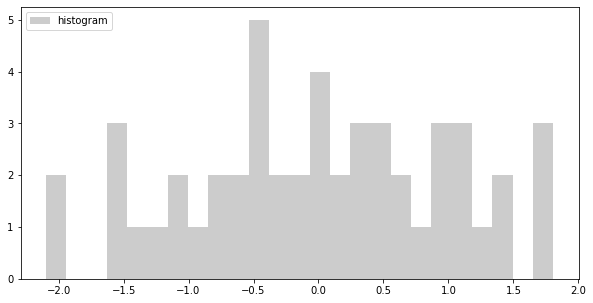

In [66]:
plt.figure(figsize=(10,5))
plt.hist(a, bins=25, color='k', alpha = 0.2, label='histogram')
plt.legend(loc = 'upper left')
plt.show()

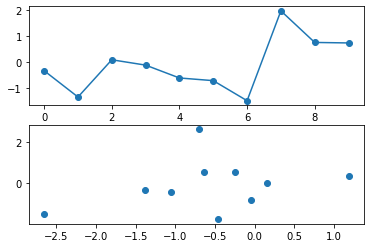

In [67]:
# 여러 그래프 그리기

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.plot(np.random.randn(10), marker = 'o')
ax2.scatter(np.random.randn(10),np.random.randn(10), marker = 'o')
plt.show()

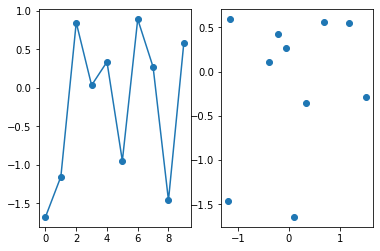

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(np.random.randn(10), marker = 'o')
ax2.scatter(np.random.randn(10),np.random.randn(10), marker = 'o')
plt.show()

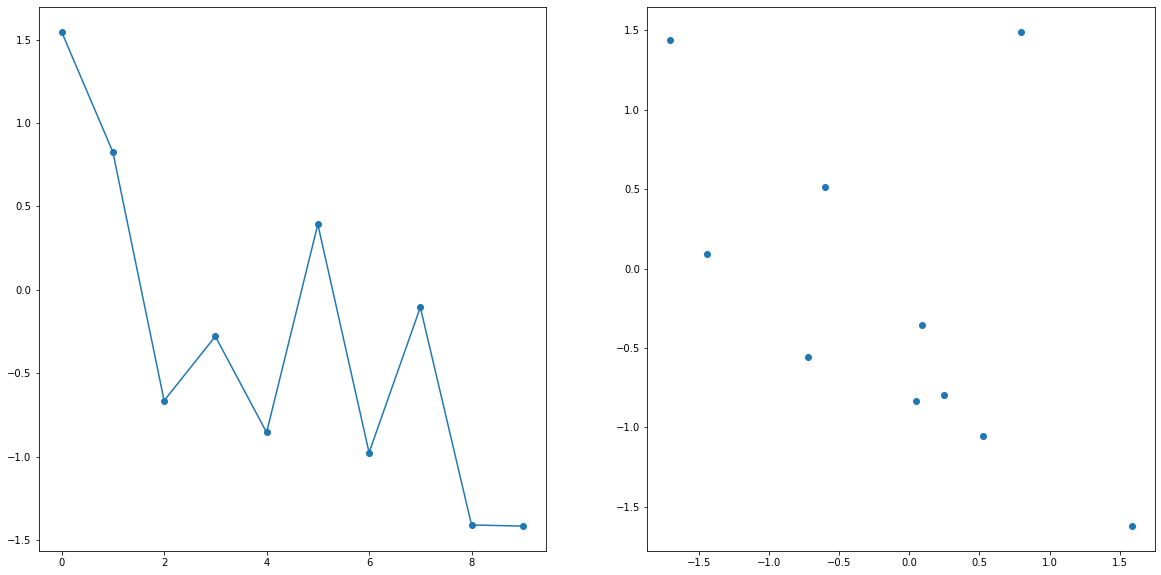

In [69]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(np.random.randn(10), marker = 'o')
ax2.scatter(np.random.randn(10),np.random.randn(10), marker = 'o')
plt.show()

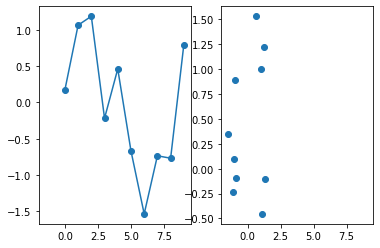

In [70]:
# sharex x축 공유 sharey y축 공유
fig, axes = plt.subplots(1,2, sharex = True, sharey = False)
axes[0].plot(np.random.randn(10),marker = 'o')
axes[1].scatter(np.random.randn(10), np.random.randn(10), marker = 'o')
plt.show()

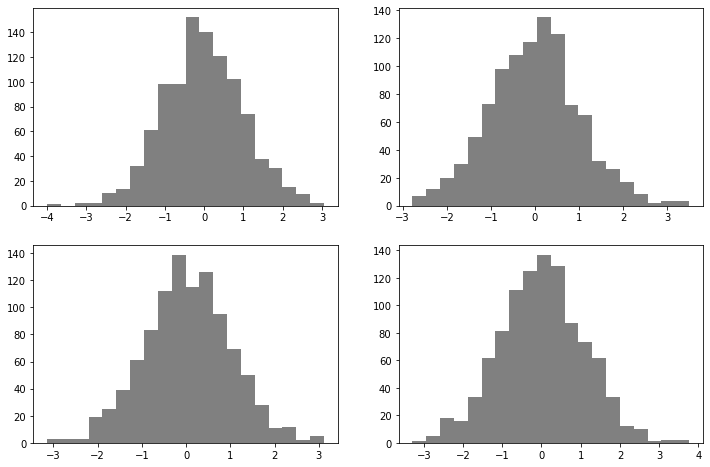

In [71]:
fig =plt.figure(figsize= (12,8))
for i in range(1,5) :
    ax1 = fig.add_subplot(2, 2, i)
    ax1.hist(np.random.randn(1000), bins = 20,  color ='gray')
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.show()

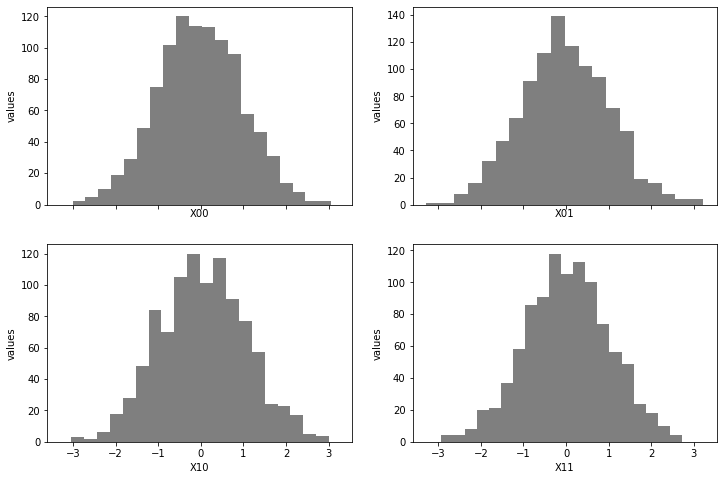

In [72]:
fig, axes = plt.subplots(2,2, sharex = True, sharey = False, figsize= (12,8))

for i in range(2) :
    for j in range(2):
        axes[i, j].hist(np.random.randn(1000), bins = 20, color = 'k', alpha = 0.5)
        axes[i, j].set_xlabel('X{}{}'.format(i,j))
        axes[i, j].set_ylabel('values')

plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

---

### 산점도 행렬

In [73]:
from sklearn import datasets

In [74]:
iris_dataset = datasets.load_iris()
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [75]:
iris_dataframe = pd.DataFrame(iris_dataset['data'],
                             columns = iris_dataset.feature_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


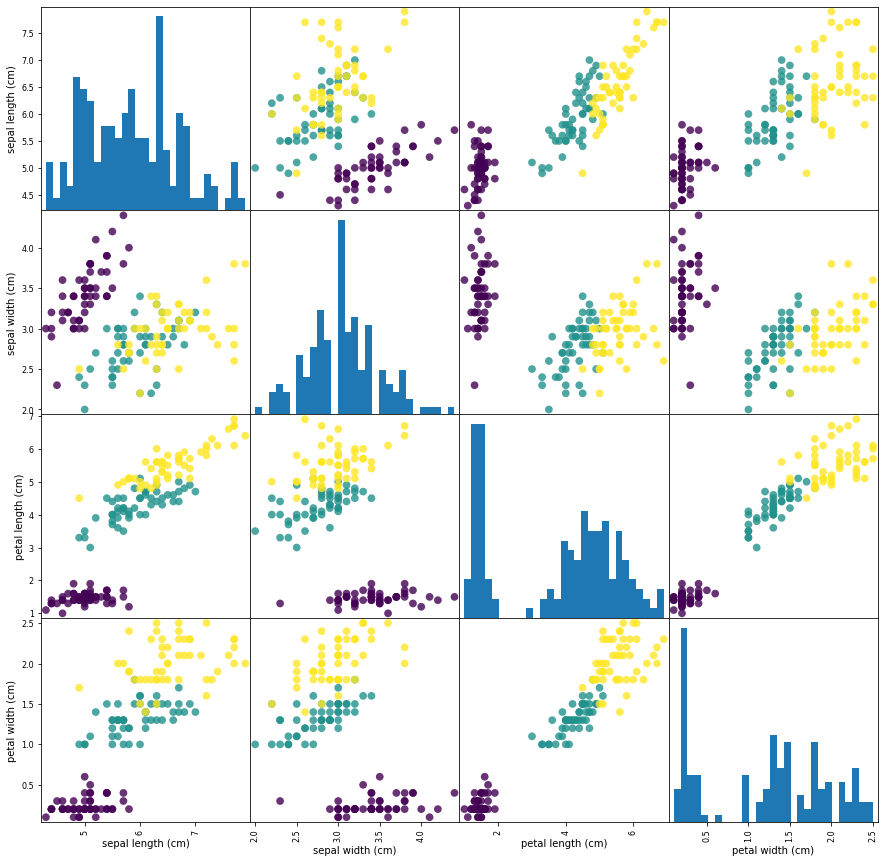

In [76]:
fig = pd.plotting.scatter_matrix(iris_dataframe, c = iris_dataset['target'],
                          figsize = (15,15),
                          marker = 'o', hist_kwds = {'bins':29}, s = 60,
                          alpha = 0.8)

ex) target 포함 5 by 5 산점도 행렬

In [77]:
column_names = iris_dataset.feature_names[0:4] + ['Species']
iris_dataframe1 = pd.DataFrame(iris_dataset['target'], columns=['Species'])
iris_dataframe2 = pd.merge(iris_dataframe, iris_dataframe1, how="left",
                          left_index= True, right_index=True)

iris_dataframe2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


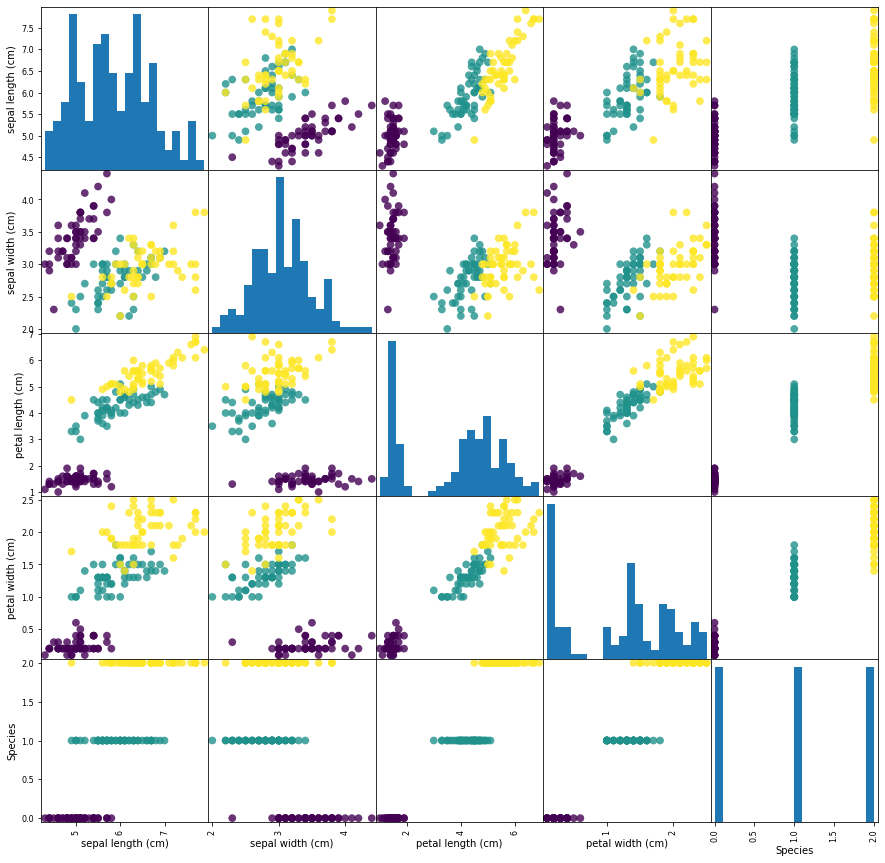

In [78]:
fig = pd.plotting.scatter_matrix(iris_dataframe2, figsize = (15,15),
                          marker='o', hist_kwds={'bins':20}, s = 60,
                          alpha=0.8, c=iris_dataset['target'])
plt.show()

### 시계열 데이터 : spx data

In [79]:
from datetime import datetime

In [80]:
data = pd.read_csv('data/spx.csv')

In [81]:
data.head()

,Unnamed: 0,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


In [82]:
data.rename(columns={data.columns[0]:'date'}, inplace=True)

In [83]:
data.head(2)

,date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92


In [84]:
data.date[0]

'1990-02-01 00:00:00'

In [85]:
# 날짜 데이터 변환

date_spx = [datetime.strptime(x,'%Y-%m-%d %H:%M:%S') for x in data.date]
date_spx[:4]

[datetime.datetime(1990, 2, 1, 0, 0),
 datetime.datetime(1990, 2, 2, 0, 0),
 datetime.datetime(1990, 2, 5, 0, 0),
 datetime.datetime(1990, 2, 6, 0, 0)]

In [86]:
len(data['SPX']), len(date_spx)

(5472, 5472)

In [87]:
datetime(2007,1,1)

datetime.datetime(2007, 1, 1, 0, 0)

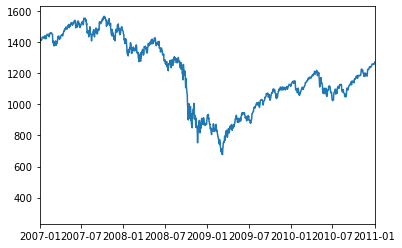

In [88]:
fig, ax = plt.subplots()

ax.plot(date_spx, data['SPX'])
ax.set_xlim([datetime(2007,1,1),datetime(2011,1,1)])
plt.show()

In [89]:
data1 = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)

In [90]:
data1.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [91]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


### Q) 인덱싱은 어떻게?

In [92]:
data1.loc[data1.index[0]]

SPX    328.79
Name: 1990-02-01 00:00:00, dtype: float64

In [93]:
data1.loc['1990-02-01']

SPX    328.79
Name: 1990-02-01 00:00:00, dtype: float64

In [94]:
spx = data1['SPX']
type(spx)

pandas.core.series.Series

In [95]:
spx.head()

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

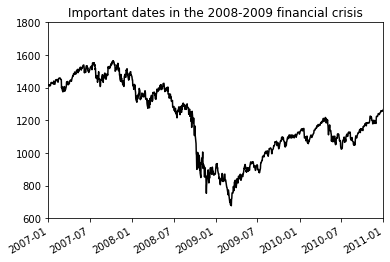

In [96]:
fig, ax = plt.subplots()

spx.plot(ax=ax, style='k-')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

### 중요 날짜 이벤트 annotation


In [97]:
crisis_data = [
    (datetime(2007,10,11), 'Peak of Bull Barket'),
    (datetime(2008,3,12), 'Bear Stearns Fails'),
    (datetime(2008,9,15), 'Lehman Bankruptcy'),
]

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

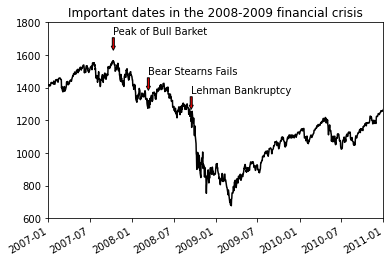

In [98]:
fig, ax = plt.subplots()
spx.plot(ax=ax, style='k-')

for date, event in crisis_data:
    ax.annotate(event,
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='red', 
                                headwidth=4, width=2, 
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

### barplot

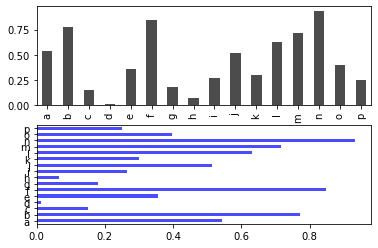

In [99]:
fig, axes = plt.subplots(2,1,figsize=(6,4))

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='b', alpha=0.7)

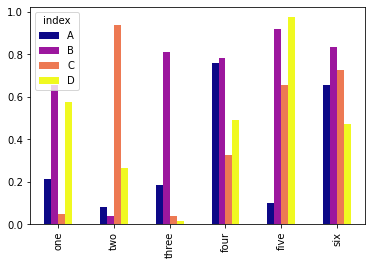

In [100]:
df = pd.DataFrame(np.random.rand(6,4),
                  index=['one','two','three','four','five','six'],
                  columns=pd.Index(['A','B','C','D'], name='index'))

df.plot.bar(cmap='plasma') # 다른 팔레트는 matplotlib document 참고

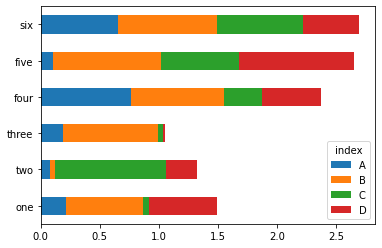

In [101]:
df.plot.barh(stacked=True)

---
### Scatter plots with a legend
- matplotlib scatter plot documentation

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

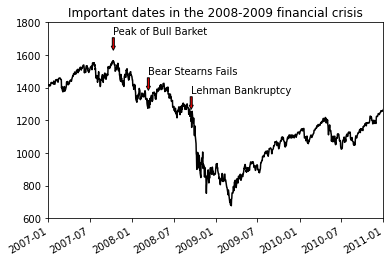

In [102]:
fig, ax = plt.subplots()
spx.plot(ax=ax, style='k-')

for date, event in crisis_data:
    ax.annotate(event,
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='red', 
                                headwidth=4, width=2, 
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0, 0.5, 'petal width (cm)')

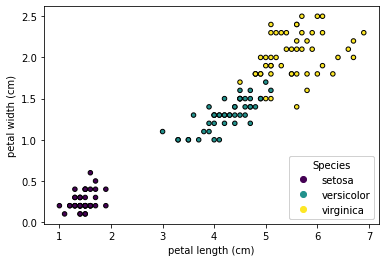

In [103]:
fig, ax = plt.subplots()
scatter = ax.scatter(x=iris_dataset.data[:,2],
                    y=iris_dataset.data[:,3],
                    edgecolor='k',
                    s=20, c = iris_dataset.target
                    )

legend1 = ax.legend(scatter.legend_elements()[0],iris_dataset.target_names,
                    loc="lower right", title="Species")
ax.add_artist(legend1)

ax.set_xlabel(iris_dataset.feature_names[2])
ax.set_ylabel(iris_dataset.feature_names[3])

### tips 데이터
1. 요일별 팁의 액수를 합산하여 막대그래프로 시각화(단, size 1,6인은 제외)
2. 요일별 사이즈별 파티 횟수를 카운트하여 막대그래프 시각화(단,size 2,3,4인만 대상)

Text(0, 0.5, 'sum of tips')

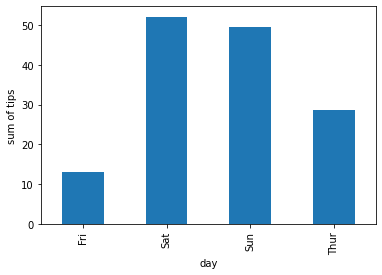

In [104]:
grouped = tips.groupby(['size','day'], as_index=False)
test = grouped.agg('sum')
test[(test['size'] >= 2) & (test['size'] <= 5)]

test2 = test.pivot_table(index=test['day'])['tip']
test3 = test2.plot.bar()
test3.set_ylabel("sum of tips")

Text(0.5, 0, 'count')

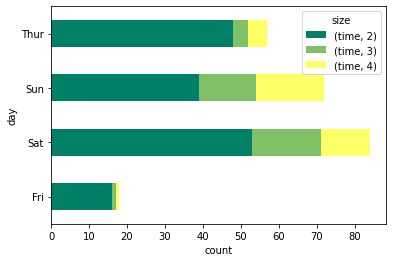

In [128]:
grouped = tips.groupby(['size','day'], as_index=False)
test = grouped.agg('count')
test = test[(test['size'] >= 2) & (test['size'] <= 4)]
test = test[['size','day','time']]
test2 = test.pivot_table(index=test['day'], columns=test['size'])
test3 = test2.plot.barh(stacked=True, cmap='summer')
test3.legend(title="size")
test3.set_xlabel("count")